# Project 1

#### This project focuses on mental health the dataset is comprised of survey answers that participants gave and it was sourced from Kagle: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. Some of the question or problems I will be adressing from the dataset are as follows: 
* What is the relationship between a family history of mental health issues and the likelihood of seeking treatment?
* How does the availability of mental health care options in the workplace affect the likelihood of employees seeking treatment?
* Are there specific occupations where self-employed individuals report higher levels of stress or mental health struggles compared to those in traditional employment?


In [140]:
# importing pandas to start wokring with the data and making a dataframe
import pandas as pd 

In [142]:
# reading the dataset
mental_health_data = pd.read_csv("MentalHealthDataset.csv")

Now taking a look at the data

In [145]:
mental_health_data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

This shows the different kinds of attributes that we have availbale to view 

In [148]:
mental_health_data.shape

(292364, 17)

We have a total of 292,364 rows/tupules of data with our 17 attributes/columns. Now lets see how many of them are null? 

In [151]:
#Checking to see which row contains null values and accounting for the sum of those values
mental_health_data.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

##### Based on the reuslts we cans see that "self_employed" contains 5,202 null values. This row contains a "Yes or no" answers from the people.

##### Lets just drop those null values since the dataset is already quite large and we are not working with that column much.

In [183]:
len(mental_health_data)

287162

In [207]:
# axis = 0 signifies that we are dropping any rows that contain null values!
mental_health_data = mental_health_data.dropna(axis=0)

In [213]:
# we are then checking the length of our data to ensure that those rows were dropped!
len(mental_health_data)

287162

For our visual let's address the first question "What is the relationship between a family history of mental health issues and the likelihood of seeking treatment?". In this survey particiapnts were asked: "Do you have a family history of mental illness?" and then "Have you sought treatment for a m
ental health condition?". Both of these questions were answered with "yes" or "no". 

In [234]:
# doing some pre-processing to extract the yes and no answers from the two columns 'family_history' and 'treatment'
num_records = len(mental_health_data) # will be using this num in order to create percentages

yes_yes = mental_health_data[(mental_health_data['family_history'] == 'Yes') & (mental_health_data['treatment'] == 'Yes')].shape[0] 
#.shape[0] allows you to get a count of the rows or in this case people that responded yes and yes to the survey questions to test 
# simply do print(yes_yes)
yes_yes_percentage = (yes_yes / num_records) * 100 #multilying by 100 allows for us to get our percentage

no_no = mental_health_data[(mental_health_data['family_history'] == 'No') & (mental_health_data['treatment'] == 'No')].shape[0]
no_no_percentage = (no_no / num_records) * 100 

yes_no = mental_health_data[(mental_health_data['family_history'] == 'Yes') & (mental_health_data['treatment'] == 'No')].shape[0]
yes_no_percentage= (yes_no / num_records) * 100 

no_yes =  mental_health_data[(mental_health_data['family_history'] == 'No') & (mental_health_data['treatment'] == 'Yes')].shape[0]
no_yes_percentage = (no_yes / num_records) * 100

### Now let's import Seaborn and Matplotlib in order to make some visuals!

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's make a bar graph so we can analyze all aspects of seeking or not seeking medical care. 1. The percentage of people who did have a familial history of mental health illness and chose to seek medical care. 2. Those who did but did not seek care. 3. Those who did not have a familial history and chose to seek medical care. 4 those who did not have familial history and did not seek care.

In [240]:
data = {'Has fam history & seeked care': yes_yes_percentage, 'No history & did not seek care': no_no_percentage, 
        'Has fam history & did not seek care': yes_no_percentage, 'No history & did seek care': no_yes_percentage
}
decisions = list(data.keys()) # this access the decison they made
percentages = list(data.values()) # this access the percentage of decisons

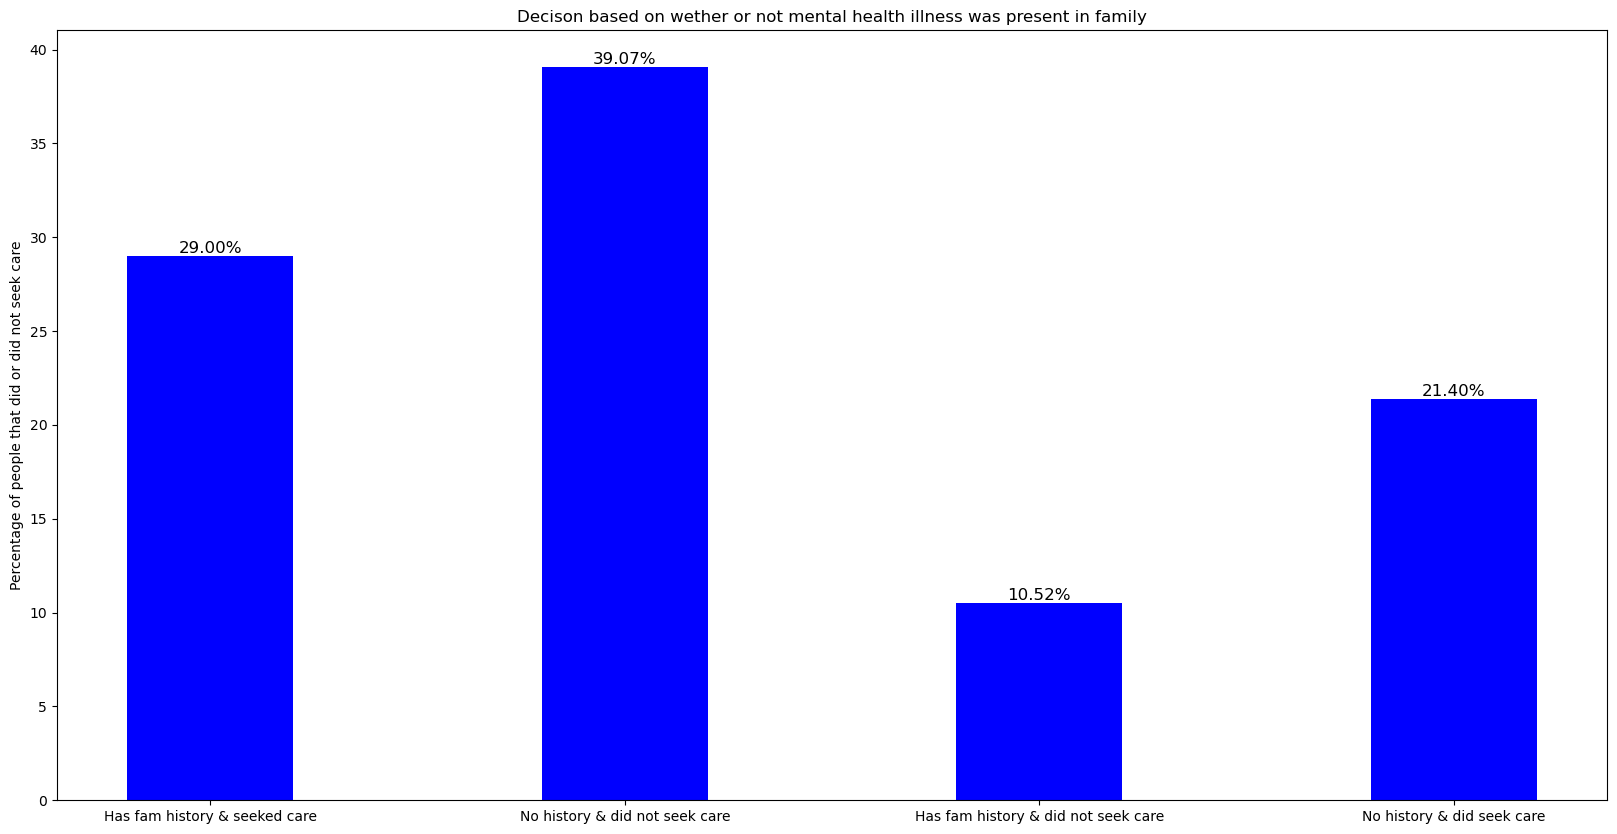

In [265]:
fig_1 = plt.figure(figsize = (20, 10))
bars = plt.bar(decisions,percentages, color = 'blue',width=.4)
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
plt.ylabel("Percentage of people that did or did not seek care")
plt.title("Decison based on wether or not mental health illness was present in family")
plt.show()

